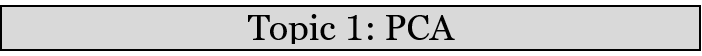

***Quetion:***

Load the Breast Cancer Dataset from sklearn.datasets. Display the first five rows of the dataset.

a) Why do we need to standardize the data before applying PCA or FA? Write code to standardize the dataset.Compute the covariance matrix of the standardized data and visualize using Heatmap.Calculate eigenvalues ( ) and eigenvectors (v) of the covariance matrix.

b) Perform PCA on the dataset and determine the optimal number of components using explained variance, sree plot, kaiser’s criterion method.

c) How many principal components explain at least 90% of the variance? Modify the PCA model accordingly.

d) Plot the first two principal components.

e) Identify the top contributing features to the first two principal components.

**Solution:**

Import Necessary Libraries and Dataset:

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt

Load dataset and display the five rows:

In [2]:
# Load the Breast Cancer Dataset 
data = load_breast_cancer() 
X = pd.DataFrame(data.data, columns=data.feature_names) 
y = pd.Series(data.target, name='target') 
X.shape #X.head()

(569, 30)

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
target_names = data.target_names
print(target_names) # Output: ['malignant' 'benign']

['malignant' 'benign']


Standardize the Data:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)     #X_scaled_df.head()

**Note:** Standardization is essential because PCA is sensitive to feature scale. Without scaling, features with large ranges dominate the PCA result.

Apply PCA to scaled data:

In [7]:
# import PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA() 
X_pca = pca.fit_transform(X_scaled)

Calculate covariance matrix:

In [8]:
# Compute the covariance matrix of the standardized data 
cov_matrix = np.cov(X_scaled.T)
# Convert to DataFrame for feature names
cov_df = pd.DataFrame(cov_matrix, index=X.columns, columns=X.columns)


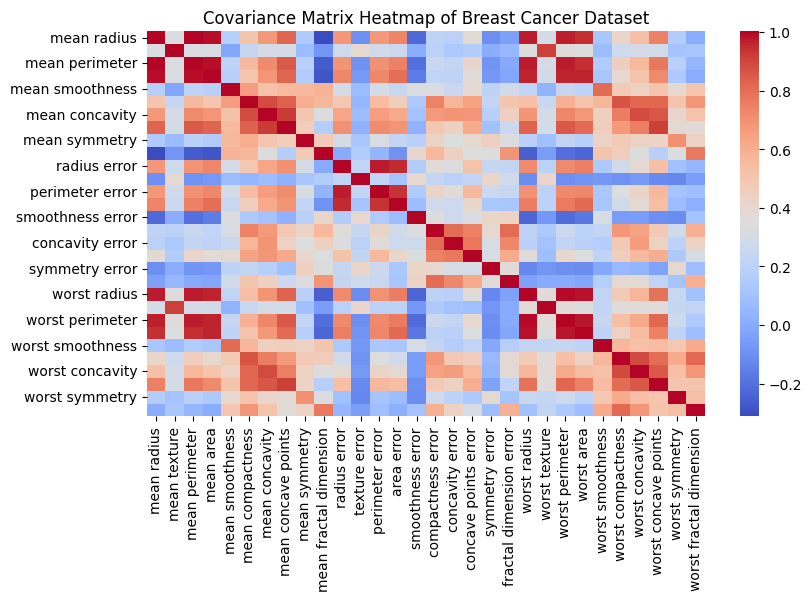

In [9]:
# Heatmap visualization 
import seaborn as sns
plt.figure(figsize=(9,5)) 
sns.heatmap(cov_df,fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Covariance Matrix Heatmap of Breast Cancer Dataset")
plt.show()


Compute Eigenvalues & Eigenvectors:

In [11]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_.T

In [12]:
print("Eigenvalues of the PCA model:\n", np.round(eigenvalues, 1))

Eigenvalues of the PCA model:
 [13.3  5.7  2.8  2.   1.7  1.2  0.7  0.5  0.4  0.4  0.3  0.3  0.2  0.2
  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0. ]


**Select Principal Components using diffrent methods:**

Apply Kaiser’s criterion: Retain components with eigenvalues > 1.

In [13]:
# Select PCs with eigenvalue > 1 
kaiser_pc_count = np.sum(eigenvalues > 1)
print(f"Number of components selected by Kaiser's criterion: {kaiser_pc_count}")

Number of components selected by Kaiser's criterion: 6


Calculate explained variance and cumulative explained variance for each principal component:

In [14]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained Variance by each component:\n", np.round(explained_variance,3))
print("Cumulative Explained Variance:\n", np.round(cumulative_variance, 3))

Explained Variance by each component:
 [0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012 0.01  0.009
 0.008 0.005 0.003 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.   ]
Cumulative Explained Variance:
 [0.443 0.632 0.726 0.792 0.847 0.888 0.91  0.926 0.94  0.952 0.961 0.97
 0.978 0.983 0.986 0.989 0.991 0.993 0.995 0.996 0.997 0.997 0.998 0.999
 0.999 1.    1.    1.    1.    1.   ]


**Note:** Using the explained variance method, we select the minimum number of PCs that cover at least 80–90% of total variance. For the Breast Cancer dataset: - First 5 principal components explain 85% variance. - First 7 principal components explain 91% variance.

Therefore, depending on the threshold, we retain 7–10 PCs.

Using Scree Plot to Visualize Eigenvalues:

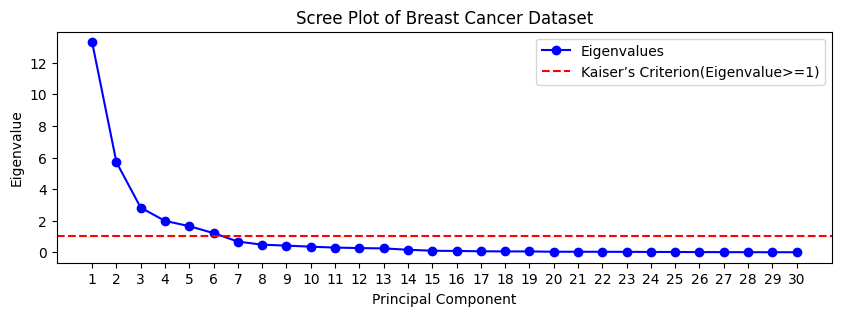

In [16]:
# Scree Plot 
plt.figure(figsize=(10,3))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', color='blue', label='Eigenvalues')
plt.axhline(y=1, color='red', linestyle='--', label='Kaiser’s Criterion(Eigenvalue>=1)')
plt.title('Scree Plot of Breast Cancer Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues)+1))
plt.legend()
plt.show()

**Note:** The scree plot shows that the first few components explain a large proportion of variance, and the curve begins to flatten after around the 7th component. According to the elbow method, we retain the first 2–3 PCs for visualization, while Kaiser’s rule suggests keeping about 6–7 PCs with eigenvalues greater than 1

Apply PCA to reduce dimensionality while retaining 90% variance:

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print("Shape of data after PCA:", X_pca.shape)

Shape of data after PCA: (569, 30)


In [18]:
pca_90= PCA(0.90)
X_pca_90 = pca_90.fit_transform(X_scaled)
print("Number of components to explain 90% variance are:", pca_90.n_components_)

Number of components to explain 90% variance are: 7


In [19]:
pca_7 = PCA(n_components=7)
X_pca_7 = pca_7.fit_transform(X_scaled)
print("Shape of data after PCA with 7 components:", X_pca_7.shape)

Shape of data after PCA with 7 components: (569, 7)


Reduce Dimensions (2D) and Visualize:

In [20]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


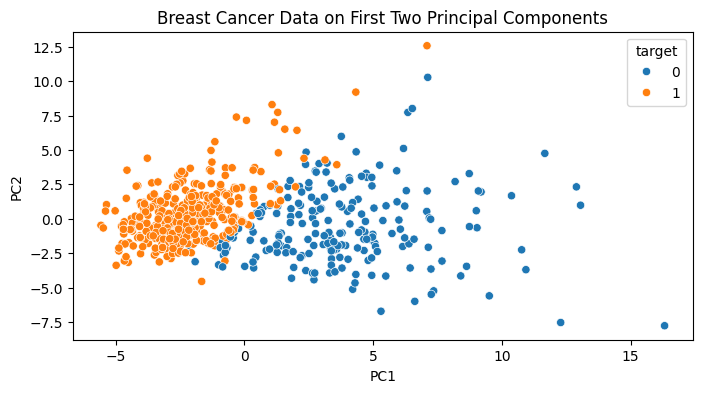

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target')
plt.title("Breast Cancer Data on First Two Principal Components")
plt.show()

Heatmap for visualize Feature Contributions to First Two PCs:

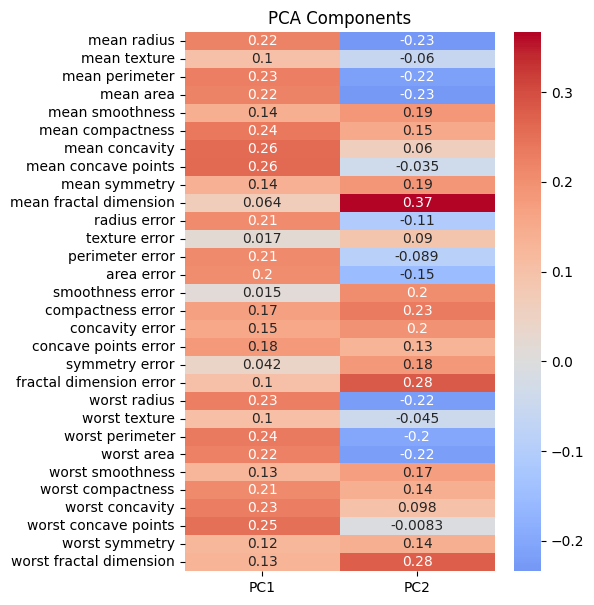

In [22]:
loadings = eigenvectors[:, :pca_2.n_components_]
df_loadings = pd.DataFrame(loadings, index=data.feature_names,
                           columns=['PC1', 'PC2'])

plt.figure(figsize=(5, 7))
sns.heatmap(df_loadings, annot=True, cmap='coolwarm', center=0)  # use annot for values, cmap for color map, center=0 to center the colormap
plt.title('PCA Components')
plt.show()


In [23]:
# Show top 5 contributing features for PC1 & PC2
print("Top features contributing to PC1:")
print(df_loadings['PC1'].abs().sort_values(ascending=False).head(5))

print("\nTop features contributing to PC2:")
print(df_loadings['PC2'].abs().sort_values(ascending=False).head(5))


Top features contributing to PC1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: PC1, dtype: float64

Top features contributing to PC2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
Name: PC2, dtype: float64


**Note:** The absolute value of loadings shows contribution (sign only indicates direction, not importance).Features with the highest absolute coefficients in PC1 and PC2 are the most influential.For the Breast Cancer dataset: 

• PC1 is usually dominated by features like mean concave points ,mean concavity ,worst concave points ,mean compactness ,worst perimeter etc.

• PC2 often has higher loadings features like mean fractal dimension ,fractal dimension error , worst fractal dimension ,mean radius ,compactness error etc.

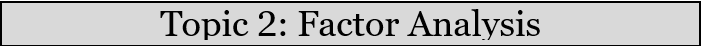

**Question:**

Use Wine dataset (place-rated data) perform Factor Analysis.

a) Import the necessary Python libraries, load the wine dataset,check for missing values and drop them if necessary, and then standardize the data

b) Perform Bartlett’s test of sphericity and the Kaiser-Meyer-Olkin (KMO) test to check the adequacy of the dataset for factor analysis, and interpret the results.

c) Fit the factor model using the principal method without rotation, obtain the eigenvalues, select the number of factors using Kaiser’s criterion, and visualize the results using a scree plot. Modify the factor model with selected number of factor.

d) Determine the factor loading matrix without rotation, plot a heatmap of the factor loadings, then refit the model using Varimax rotation and compare the rotated loadings with the unrotated loadings.

e) Calculate the communalities from the original and rotated factor models, compare them, and compute the specific variances for the variables.

f) Calculate the factor scores for each observation in the dataset and interpret their meaning in the context of the wine dataset.

**Solution:**

load necessary libraries and Dataset:

In [24]:
# use this line to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [27]:
# Load dataset and display first two rows
df = pd.read_csv("places_tf.csv")
df.head(2)

,climate,housing,health,crime,trans,educate,arts,recreate,econ,id
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695,1
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489,2


In [28]:
df.drop(columns=['id'], inplace=True)
df.shape

(329, 9)

In [29]:
df.isnull().sum()

climate     0
housing     0
health      0
crime       0
trans       0
educate     0
arts        0
recreate    0
econ        0
dtype: int64

Standardize the data:

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data_df.head(2)

,climate,housing,health,crime,trans,educate,arts,recreate,econ
0,-0.014610,-1.093345,-1.814668,0.080376,0.052190,-0.123093,-0.382046,-0.420488,1.760687
1,0.363174,0.028749,0.823605,-0.024829,0.581477,-1.188533,0.990577,1.032516,-1.134480


**Note:** Factor analysis (and PCA) typically uses the correlation matrix (not the covariance matrix). Standardizing converts all variables to the same scale (mean 0, SD 1) so each variable contributes equally.Without standardization, variables with large variance (large numeric ranges) will dominate the factor extraction and distort the factor structure.

**Bartlett’s and KMO Tests:**

In [31]:
# Bartlett’s test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

chi_square_value, p_value = calculate_bartlett_sphericity(scaled_data)
print(f"Bartlett’s test Chi-square value: {chi_square_value}, p-value: {p_value}")

Bartlett’s test Chi-square value: 839.4267918709929, p-value: 5.995552889692028e-153


In [34]:
# Kaiser-Meyer-Olkin (KMO)
kmo_all, kmo_model = calculate_kmo(scaled_data)
print("KMO overall:", kmo_model)

KMO overall: 0.702930583818996


Note: KMO (Kaiser–Meyer–Olkin) test
Purpose: Measures sampling adequacy (ratio of partial correlations to total correlations). Scale interpretation (Kaiser, 1974): 

0.90–1.00 = Marvelous

0.80–0.89 = Meritorious

0.70–0.79 = Middling

0.60–0.69 = Mediocre

0.50–0.59 = Miserable

<0.50 = Unacceptable

**Determine the number of factors to extract using eigenvalues:**

In [36]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation=None)
fa.fit(scaled_data)

eigenvalues, vectors = fa.get_eigenvalues()
print("Eigenvalues:\n", eigenvalues)


Eigenvalues:
 [3.297793   1.21356187 1.10552987 0.90727984 0.86062869 0.5621858
 0.48382061 0.31807215 0.25112816]


In [37]:
# using kaiser criterion to select number of factors
num_factors = sum(eigenvalues > 1)
print("Number of factors to retain (Kaiser criterion):", num_factors)


Number of factors to retain (Kaiser criterion): 3


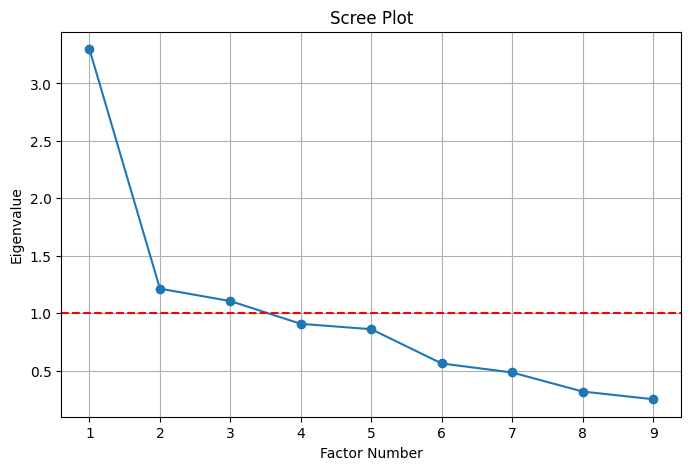

In [38]:
# use scree plot to determine the number of factors to extract
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid()  # Add grid lines for better readability
plt.axhline(y=1, color='r', linestyle='--')  # Add a horizontal line at y=1
plt.show()

In [39]:
fa1 = FactorAnalyzer(n_factors=num_factors, rotation=None, method='principal')
fa1.fit(scaled_data)

loadings = fa1.loadings_
# print("Factor Loadings:\n", loadings)

In [40]:
df_loadings = pd.DataFrame(
    loadings,
    index=df.columns,
    columns=[f'Factor{i+1}' for i in range(num_factors)]
)
df_loadings

,Factor1,Factor2,Factor3
climate,0.286819,0.075603,0.840848
housing,0.698073,0.153355,0.083712
health,0.744389,-0.409595,-0.020477
crime,0.470524,0.522313,0.135076
trans,0.680792,-0.155864,-0.148325
educate,0.498170,-0.498323,-0.253456
arts,0.860498,-0.115020,0.011593
recreate,0.641790,0.321609,0.043967
econ,0.297846,0.595373,-0.533407


Use Factor Rotation(varimax) to improve interpretability of factors:

In [42]:
#### Use Factor Rotation (varimax) to improve interpretability of factors
fa_rotated = FactorAnalyzer(n_factors=num_factors, rotation='varimax', method='principal')
fa_rotated.fit(scaled_data)

loadings_rotated = fa_rotated.loadings_

In [43]:
df_loadings_rotated = pd.DataFrame(
    loadings_rotated,
    index=df.columns,
    columns=[f'Factor{i+1}' for i in range(num_factors)]
)
df_loadings_rotated


,Factor1,Factor2,Factor3
climate,0.021419,0.236416,0.859451
housing,0.438154,0.545767,0.167306
health,0.829227,0.126177,0.136981
crime,0.031006,0.701044,0.141509
trans,0.652352,0.288896,-0.027356
educate,0.733441,-0.094397,-0.117867
arts,0.738407,0.430850,0.151473
recreate,0.301406,0.645226,0.100488
econ,-0.022131,0.652516,-0.549032


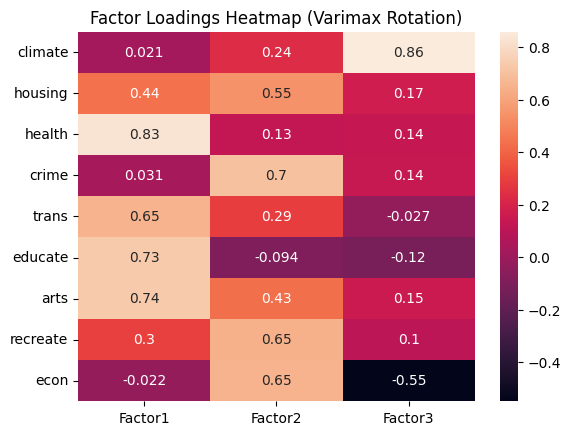

In [44]:
# Visualize the factor loadings using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_loadings_rotated, annot=True)
plt.title('Factor Loadings Heatmap (Varimax Rotation)')
plt.show()


Calculate communalities:

In [45]:
df_Communalities = pd.DataFrame(
    fa_rotated.get_communalities(),
    index=df.columns,
    columns=['Communalities']
)
df_Communalities

,Communalities
climate,0.795007
housing,0.517832
health,0.722302
crime,0.512449
trans,0.509772
educate,0.560739
arts,0.753821
recreate,0.517259
econ,0.727704


In [46]:
# specific_variances = 1 - communalities
df_Uniquenesses = pd.DataFrame(
    fa_rotated.get_uniquenesses(),
    index=df.columns,
    columns=['Uniquenesses']
)
df_Uniquenesses

,Uniquenesses
climate,0.204993
housing,0.482168
health,0.277698
crime,0.487551
trans,0.490228
educate,0.439261
arts,0.246179
recreate,0.482741
econ,0.272296


In [47]:
factor_scores = fa_rotated.transform(scaled_data)  # by default it gives the regression method
df_factor_scores = pd.DataFrame(
    factor_scores,
    columns=[f'Factor{i+1}' for i in range(num_factors)]
)
df_factor_scores.head(2)

,Factor1,Factor2,Factor3
0,-1.146395,0.66164,-1.136196
1,0.341349,0.13737,1.137143


**Note:** Factor scores were computed as standardized weighted sums of the original variables. They represent each observation’s standing on the extracted factors. For example, a high score on Factor 1 (Quality of life) indicates a city with above-average climate, housing, and education, and belowaverage crime. A high score on Factor 2 (Culture) reflects stronger arts and recreation facilities. A high score on Factor 3 (Economy) reflects favorable economic conditions and transport. Thus, factor scores allow us to summarize each city’s profile on a few meaningful latent dimensions.

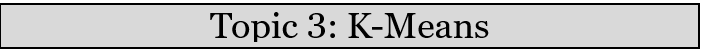

**Questions:**

Write python code to import necessary libraries for cluster analysis. 

(a) Generate a 500 synthetic clustering data in Python.

(b) Apply K-Means clustering with k=3 and visualize the results. 

(c) Determine the optimal number of clusters using the Elbow Method. 

(d) Compare the performance of K-Means with other clustering methods. 

(e) Construct a dendrogram for Hierarchical clustering .


**Solution:**

In [48]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

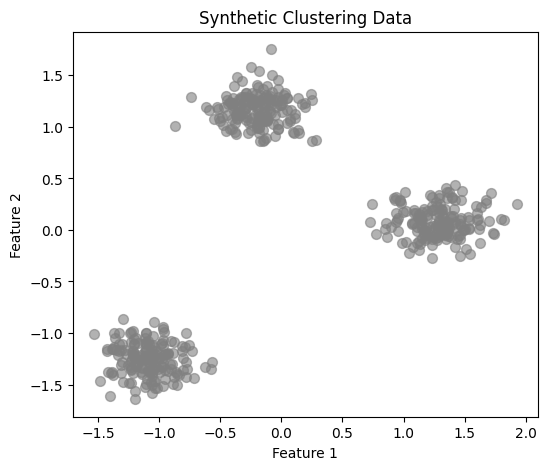

In [49]:
# ---------------------------
# (a) Generate synthetic clustering data
# ---------------------------
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=50, alpha=0.6)
plt.title('Synthetic Clustering Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

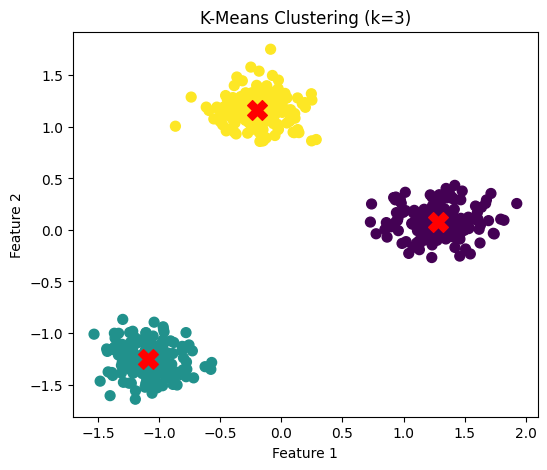

In [50]:
# ---------------------------
# (b) Apply K-Means clustering with k=3 and visualize results
# ---------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

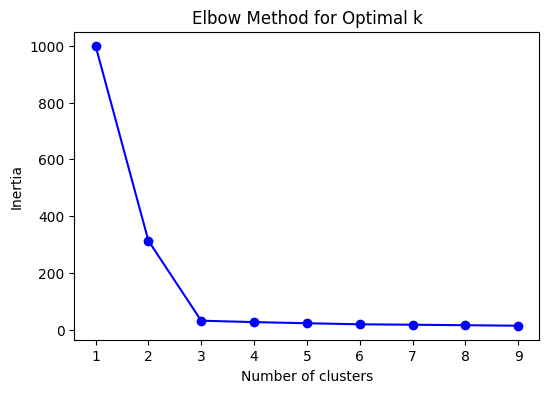

In [51]:
# ---------------------------
# (c) Determine optimal number of clusters using Elbow Method
# ---------------------------
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [52]:
# ---------------------------
# (d) Compare K-Means with Agglomerative Clustering
# ---------------------------
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

print("Silhouette Score (K-Means):", silhouette_score(X_scaled, clusters))
print("Silhouette Score (Agglomerative):", silhouette_score(X_scaled, agglo_labels))


Silhouette Score (K-Means): 0.8438960565792794
Silhouette Score (Agglomerative): 0.8438960565792794


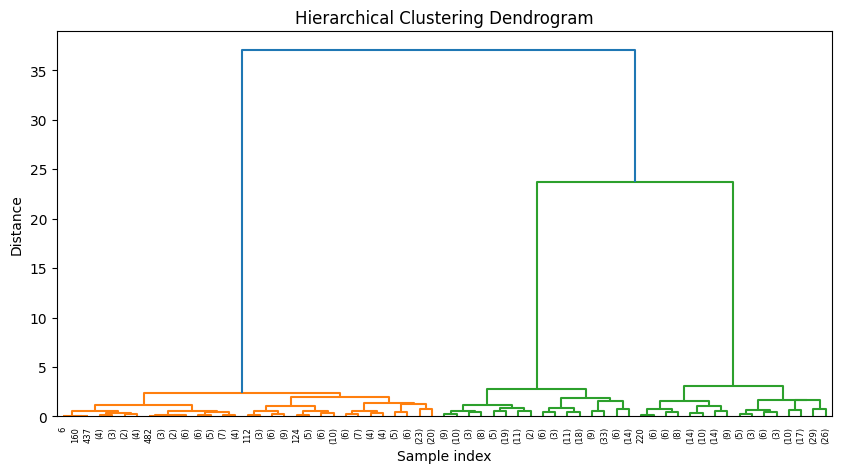

In [53]:
# ---------------------------
# (e) Construct a dendrogram for Hierarchical Clustering
# ---------------------------
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

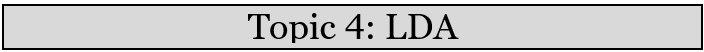

**Questions:**

The Iris dataset contains 150 observations of iris flowers with four features: sepal length, sepal width, petal length, and petal width, along with the species label (Setosa, Versicolor, Virginica).

1. perform Linear Discriminant Analysis (LDA) to obtain the linear discriminant axes.

2. Compute class mean vectors for each species.

3. Compute the within-class scatter matrix (Sw) and the between-class scatter matrix (Sb) manually.

4. Calculate the explained variance ratio for each discriminant axis.

5. Project the original data onto the first two linear discriminant axes.

6. Visualize the projected data in a scatter plot (LD1 vs LD2) with points colored by species.



**Solution:**

Iris Image for diffrent specis:

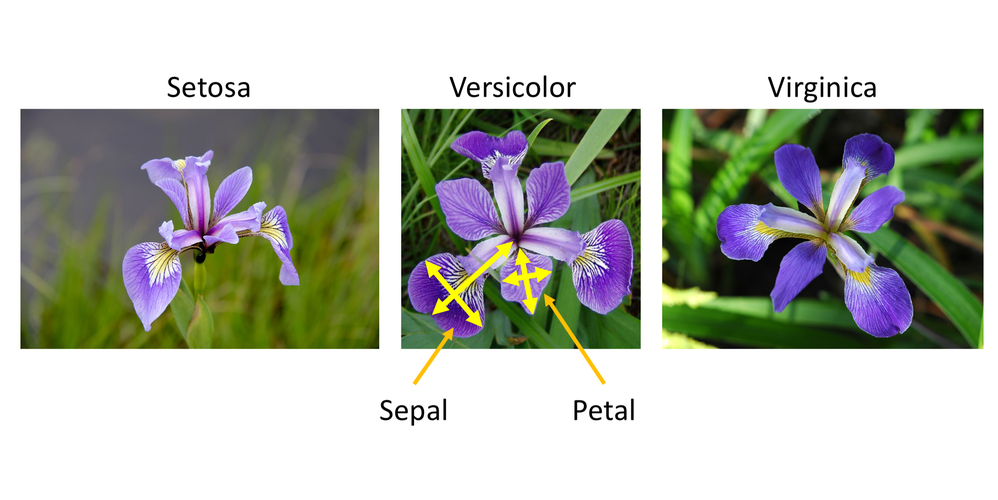

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X, columns=load_iris().feature_names)
df['target'] = y
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
X_lda.shape

(150, 2)

In [57]:
# Class means from model
class_means = lda.means_
print("Class means:\n", class_means)

Class means:
 [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


In [58]:
# Scatter matrices
C = np.unique(y)  # C means classes
m = X.mean(0)     # overall mean of X

Sw = Sb = np.zeros((X.shape[1], X.shape[1]))  # zeros means initial zero matrix

for c in C:
    Xi = X[y == c]
    mc = Xi.mean(0)
    ni = len(Xi)
    
    Sw += (Xi - mc).T @ (Xi - mc)
    d = (mc - m).reshape(-1, 1)
    Sb += ni * d @ d.T

print("Within-class scatter (Sw):\n", Sw)
print("Between-class scatter (Sb):\n", Sb)


Within-class scatter (Sw):
 [[102.16833333  -6.32266667 189.873       76.92433333]
 [ -6.32266667  28.30693333 -49.1188     -18.12426667]
 [189.873      -49.1188     464.3254     193.0458    ]
 [ 76.92433333 -18.12426667 193.0458      86.56993333]]
Between-class scatter (Sb):
 [[102.16833333  -6.32266667 189.873       76.92433333]
 [ -6.32266667  28.30693333 -49.1188     -18.12426667]
 [189.873      -49.1188     464.3254     193.0458    ]
 [ 76.92433333 -18.12426667 193.0458      86.56993333]]


In [59]:
# Explained variance ratio
print("Explained variance ratio:", lda.explained_variance_ratio_)

Explained variance ratio: [0.9912126 0.0087874]


In [60]:
# Projected data
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['target'] = y
df_lda.head(2)

,LD1,LD2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0


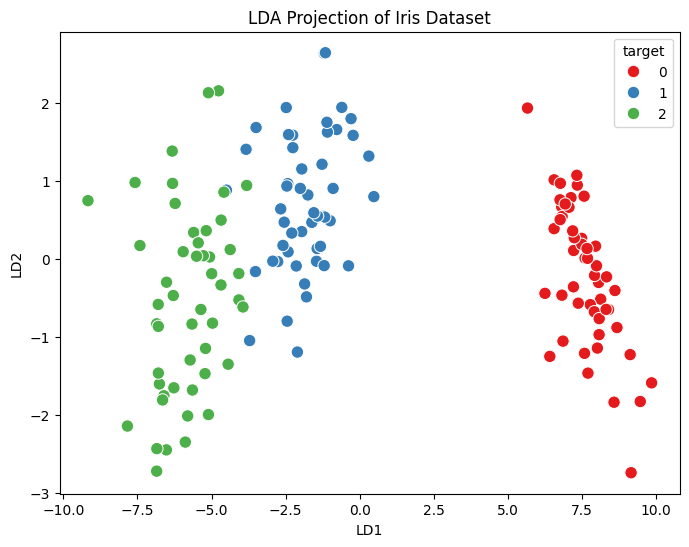

In [61]:
# Seaborn scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LD1', y='LD2', hue='target', palette='Set1', data=df_lda, s=80)
plt.title("LDA Projection of Iris Dataset")
plt.show()

**Note:** Setosa cluster is fully separated. Versicolor and Virginica slightly overlap along LD2. Two discriminants are enough for clear visualization. LD1 is dominant for separation.

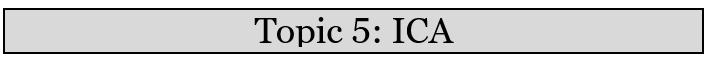

**Question:**

a) Generate 3 independent source signals (e.g., sine, square, and sawtooth waves).

b) Create a mixed signal using a random mixing matrix.

c) Apply ICA algorithm (e.g., FastICA) to recover the original signals.

d) Compare recovered signals with the original sources.

**Solution:**

In [62]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

In [63]:
np.random.seed(42)

# Generate sample data for ICA
n_samples = 200
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)           # Signal 1: sine wave
s2 = np.sign(np.sin(3 * time))  # Signal 2: square wave
s3 = np.random.rand(n_samples)  # Signal 3: random noise

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S[:3]  # Display the first 3 samples

array([[-0.13600494,  0.04645074,  0.43315461],
       [-0.06255487,  1.3731549 ,  1.04548089],
       [-0.07814879,  1.13131072,  0.53705761]])

In [64]:
# Apply FastICA algorithm for estimating the sources
A = np.array([[1, 1, 1],
              [0.5, 2, 1.0],
              [1.5, 1.0, 2.0]])  # Mixing matrix

X = S @ A.T  # Generate observations

X[:3]  # Display the first 3 samples

array([[0.34360041, 0.45805362, 0.70875255],
       [2.35608092, 3.76051326, 3.37028438],
       [1.59021954, 2.76060465, 2.08820275]])

In [65]:
# FastICA algorithm
ica = FastICA(n_components=3, random_state=42)
S_ = ica.fit_transform(X)  # Reconstruct signals

Visualize the signals:

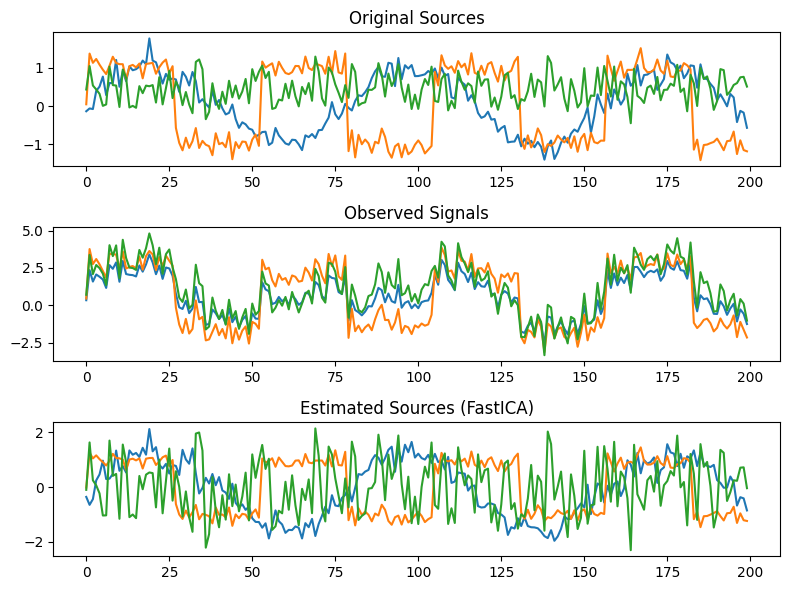

In [67]:
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()

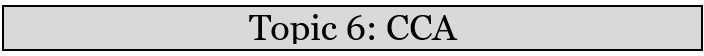

***Question:***

Using the Iris dataset, perform Canonical Correlation Analysis (CCA) to explore the relationship between the sepal and petal characteristics of the flowers. Consider sepal length and sepal width as one set of variables and petal length and petal width as another set. Compute the canonical correlations and interpret the results.

**Solution:**

In [68]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the Iris dataset
iris, y = load_iris(return_X_y=True, as_frame=True)

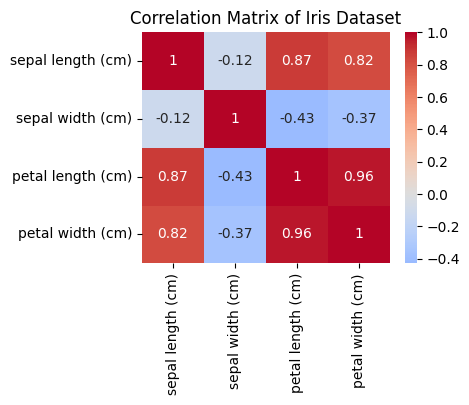

In [71]:
# Calculate correlation matrix
corr_matrix = iris.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

**Note:** We can see that sepal width is negatively correlated with petal-related features, while sepal length is strongly and positively correlated with them.

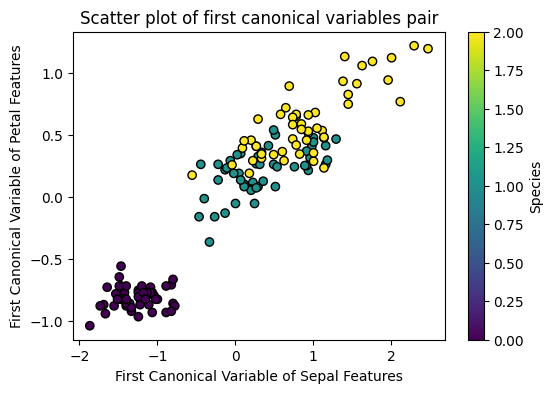

In [72]:
# Extract sepal and petal features
iris1 = load_iris()
x = iris1.data[:, :2]  # Sepal length and width
y = iris1.data[:, 2:]  # Petal length and width

# Apply CCA
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(x, y)

# Plot the first canonical variables
plt.figure(figsize=(6, 4))
plt.scatter(X_c[:, 0], Y_c[:, 0], c=load_iris().target, cmap='viridis', edgecolors='k')
plt.title("Scatter plot of first canonical variables pair")
plt.xlabel("First Canonical Variable of Sepal Features")
plt.ylabel("First Canonical Variable of Petal Features")
plt.colorbar(label='Species')
plt.show()

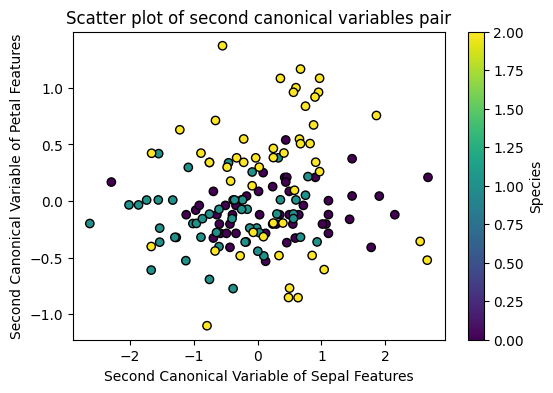

In [73]:
# Plot the second canonical variables
plt.figure(figsize=(6, 4))
plt.scatter(X_c[:, 1], Y_c[:, 1], c=load_iris().target, cmap='viridis', edgecolors='k')
plt.title("Scatter plot of second canonical variables pair")
plt.xlabel("Second Canonical Variable of Sepal Features")
plt.ylabel("Second Canonical Variable of Petal Features")
plt.colorbar(label='Species')
plt.show()

**Note:** The canonical variables show clear separation among the three species of iris flowers, indicating that CCA effectively captures the relationships between sepal and petal features. We can see a very nice linear relationship between canonical variates in the first pair and no relationship in the second.